In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10am __the day before the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Put your name here: Pavan </p>

---
# __Linear Algebra 1: A Review of least squares fitting, Pre-class__

# Learning objectives

At the end of the exercise, you should be able to:
- Define what a linear system is.
- Differentiate under-defined and over-defined systems.
- Solve an over-defined system of equations using least square fit.
- Solve the same problem using pseudoinverse.

# Outline

1. [Linear systems](#Linear_systems)
2. [Least Square Fit](#Overdefined_systems)
3. [Using the Pseudoinverse](#Pseudoinverse)
4. [Assignment wrap-up](#Assignment_wrap-up)

----
<a name="Linear_systems"></a>

# 1. Linear systems

Linear algebra is solving a system of linear equations where each equation is of the form:

$$a_1x_1 + a_2x_2 + a_3x_3 \dots + a_nx_n = b$$

This equation is also called a linear combination where you add together terms that are  multiplied together.  (Combinations of Addition and Multiplication are core concepts in linear algebra). 

Typically we have multiple versions of the same equation where the constance ($x$ terms) are the same but the variables ($a$ and $b$) are different:


$$a_{11}x_1 + a_{12}x_2 + a_{13}x_3 \dots + a_{1n}x_n = b_1$$
$$a_{21}x_1 + a_{22}x_2 + a_{23}x_3 \dots + a_{2n}x_n = b_2$$
$$a_{31}x_1 + a_{32}x_2 + a_{33}x_3 \dots + a_{3n}x_n = b_3$$
$$\vdots$$
$$a_{m1}x_1 + a_{m2}x_2 + a_{m3}x_3 \dots + a_{mn}x_n = b_m$$


This is a lot of writing so we generally rewrite these equations in matrix form as follows:

$$ 
\left[
\begin{matrix}
    a_{11} & a_{12} & a_{13} &  \dots  & a_{1n} \\
    a_{21} & a_{22} & a_{23} &  \dots  & a_{2n} \\
    a_{31} & a_{32} & a_{33} &  \dots  & a_{3n} \\
      &  \vdots & & \ddots & \\
    a_{m1} & a_{m2} & a_{m3} &  \dots  & a_{mn} 
\end{matrix}
\right] 
\left[
\begin{matrix}
    x_{1}  \\
    x_{2}  \\
    x_{3}  \\
    \vdots \\
    x_{n}  
\end{matrix}
\right] 
=
\left[
\begin{matrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    \vdots \\
    b_{n}  
\end{matrix}
\right] 
$$

The first matrix is often called $A$, the constants are often called $c$ and the right hand matrix is often called $b$.  We typically simplify this equation using Matrix notation as follows:

$$Ax = b$$


For example,  consider the following set of linear equations:

$$ 3x_1-3x_2+9x_3 = 24$$
$$ 2x_1-2x_2+7x_3 = 17$$
$$ -x_1+2x_2-4x_3 = -11$$

It's Matrix format is as follows:

$$ 
\left[
\begin{matrix}
    3 & -3 & 9\\ 
    2 & -2 & 7 \\
    -1 & 2 & -4
\end{matrix}
\right] 
\left[
\begin{matrix}
    x_1 \\ 
    x_2 \\
    x_3
\end{matrix}
\right] 
=
\left[
\begin{matrix}
    24\\ 
    17 \\
    -11
\end{matrix}
\right] 
$$

&#9989; **<font color=blue>DO THIS:</font>** Let's define these same Matrixes as ```numpy``` variables (displayed using ```sympy```, which looks prettier). So first, install `sympy`.

In [1]:
!pip install sympy

In [2]:
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True) # Trick to make matrixes look nice in jupyter

In [3]:
A = np.matrix([[3, -3, 9], [2, -2, 7], [-1, 2, -4]])
sym.Matrix(A)

⎡3   -3  9 ⎤
⎢          ⎥
⎢2   -2  7 ⎥
⎢          ⎥
⎣-1  2   -4⎦

In [4]:
b = np.matrix([[24], [17], [-11]])
sym.Matrix(b)

⎡24 ⎤
⎢   ⎥
⎢17 ⎥
⎢   ⎥
⎣-11⎦

In [5]:
#Calculate answer to x using numpy
x = np.linalg.solve(A,b)
sym.Matrix(x)

⎡3.0 ⎤
⎢    ⎥
⎢-2.0⎥
⎢    ⎥
⎣1.0 ⎦

&#9989; **<font color=blue>DO THIS:</font>** Considering the following equations, specify $A$ and $b$, solve $x$ with `numpy`, and print out the solution with `sympy`.

$$ 2x_1+x_2-2x_3 = 3$$
$$ x_1-x_2-x_3 = 0$$
$$ x_1+x_2+3x_3 = 12$$

In [6]:
# Put your codes here
A = np.matrix([[1, 1, -2], [1, -1, -1], [1, 1, 3]])
sym.Matrix(A)

⎡1  1   -2⎤
⎢         ⎥
⎢1  -1  -1⎥
⎢         ⎥
⎣1  1   3 ⎦

In [7]:
b = np.matrix([[3], [0], [12]])
sym.Matrix(b)

⎡3 ⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣12⎦

In [8]:
#Calculate answer to x using numpy
x = np.linalg.solve(A,b)
sym.Matrix(x)

⎡4.2⎤
⎢   ⎥
⎢2.4⎥
⎢   ⎥
⎣1.8⎦

----
<a name="Overdefined_systems"></a>
         
# 2. Least Square Fit (LSF)

## 2.1 An over-defined system

The above Linear Systems has a single solution.  However, linear systems of the form $Ax=b$ can also be __under-defined__ which means they can have infinite solutions and __over-defined__ which can have no solutions.  In data-science over-defined systems are quite common, consider the following example.

**Example:** A researcher has conducted experiments of a particular Hormone dosage in a population of rats. The table shows the number of fatalities at each dosage level tested. Determine the least squares line and use it to predict the number of rat fatalities at hormone dosage of 22. 

| Hormone level  | 20 | 25 | 30 | 35 | 40 | 45 | 50  |
|---|---|---|---|---|---|---|---|
| Fatalities | 101 | 115 | 92 | 64 | 60 | 50 | 49| 


In [9]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import time
sym.init_printing(use_unicode=True)

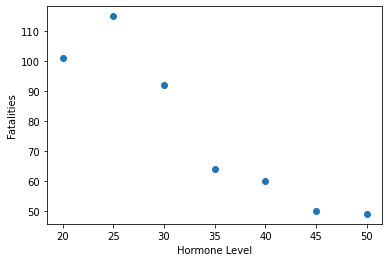

In [10]:
H = [20,25,30,35,40,45,50]
f = [101,115, 92,64,60,50,49]

plt.scatter(H,f)
plt.xlabel('Hormone Level')
plt.ylabel('Fatalities');

&#9989; <font color=red>**QUESTION:**</font>  Basd on the above graph, can you find a line that pass through all the points? Why and why not?

<font size=+3>&#9998;</font> We can not find the line that passes to all te points but we can approximate the fit as points are not in the stright line

We want to determine a line that is expressed by the following equation 

$$Hx_1 + x_2 = f$$

to approximate the connection between Hormone dosage ($H$) and Fatalities $f$. 
That is, we want to find $x_1$ (slope) and $x_2$ (y-intercept) for this line. If we wanted to we could make a serise of equations using the datapoints from above as follows:

$$20x_1 + x_2 = 101$$
$$25x_1 + x_2 = 115$$
$$30x_1 + x_2 = 92$$
$$\vdots$$
$$50x_1 + x_2 = 49$$

However, hopefully you can see that there is no solution for $x_1$ and $x_2$ that will fit all of these equations.  Instead we convert the equations to matrix format ($Ax=b$) and solve for the best fit of $x$ using Least Squares Fit.  

## 2.2 Using LSF to find solution

&#9989; **<font color=blue>DO THIS:</font>** If you are new to LSF please watch the following video:

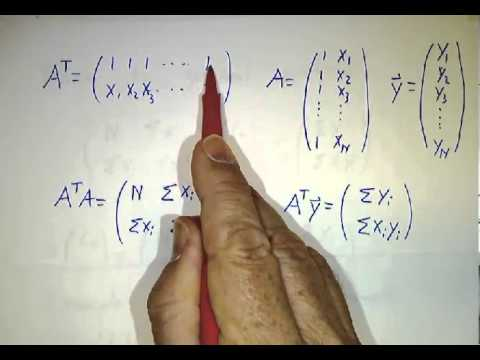

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo("Lx6CfgKVIuE",width=640,height=360)

&#9989; **<font color=blue>DO THIS:</font>** Run the following code cells to find the least square solution.

__Step 1.__ To get the above equations into the matrix form $Ax=b$, we first define the variable:

$$ 
x = \left[
\begin{matrix}
    x_1  \\
    x_2  
\end{matrix}
\right] 
$$

as the column vector that needs to be solved. 



__Step 2.__ Define $A$ matrix using the values of $H$ and 1 (Something to multiply by $x_2$)

In [12]:
#Our A matrix can be solved as follow
A = np.matrix(np.vstack((H, np.ones(len(H)))).T)
sym.Matrix(A)

⎡20.0  1.0⎤
⎢         ⎥
⎢25.0  1.0⎥
⎢         ⎥
⎢30.0  1.0⎥
⎢         ⎥
⎢35.0  1.0⎥
⎢         ⎥
⎢40.0  1.0⎥
⎢         ⎥
⎢45.0  1.0⎥
⎢         ⎥
⎣50.0  1.0⎦

__Step 3.__ Define the matrix $b$ using fatality values $f$:

In [13]:
b = np.matrix(f).T
sym.Matrix(b)

⎡101⎤
⎢   ⎥
⎢115⎥
⎢   ⎥
⎢92 ⎥
⎢   ⎥
⎢64 ⎥
⎢   ⎥
⎢60 ⎥
⎢   ⎥
⎢50 ⎥
⎢   ⎥
⎣49 ⎦

__Step 4.__ Solve LSF using the ```numpy.linalg.lstsq``` (stands for least square) function as follows:

In [14]:
x,err,_,_ = np.linalg.lstsq(A,b, rcond=None)
sym.Matrix(x)

⎡-2.27142857142857⎤
⎢                 ⎥
⎣155.357142857143 ⎦

In [15]:
bestfit = A*x
sym.Matrix(bestfit)

⎡109.928571428571⎤
⎢                ⎥
⎢98.5714285714285⎥
⎢                ⎥
⎢87.2142857142857⎥
⎢                ⎥
⎢75.8571428571428⎥
⎢                ⎥
⎢64.4999999999999⎥
⎢                ⎥
⎢53.1428571428571⎥
⎢                ⎥
⎣41.7857142857142⎦

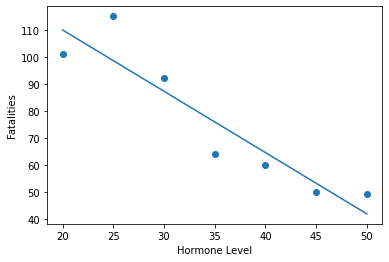

In [16]:
plt.scatter(H,f)
plt.plot(H, bestfit)
plt.xlabel('Hormone Level')
plt.ylabel('Fatalities');

----
<a name="pseudoinverse"></a>
         
# 3. Pseudoinverse

## 3.1 Define pseudoinverse

The ```numpy.linalg.lstsq``` function does all of the work for us. We can also get the same result using the Pseudoinverse of the $A$ matrix.  The Pseudoinverse (P_{inv}) for this type of problem is defined as follows:

$$P_{inv} = (A^TA)^{-1}A^T$$

The above can be read, "The Pseudoinverse is the inverse of A transpose times A (which is a sqare matrix) times A transpose."  We can calculate the Pseudoinverse using the following python numpy matrix code:

&#9989; **<font color=red>QUESTION:</font>** In section 2, we defined $A$ which has a dimension of $7\times 2$. What are the dimensions of the following?

- $A^T$
- $A^TA$ (Note: $(A^TA)^{-1}$ has the same dimension)
- $P_{inv}$

<font size=+3>&#9998;</font> 
1. 2*7
2. 2*2
3. 2*7

## 3.2 Solve a system of equations with pseudoinverse

&#9989; **<font color=blue>DO THIS:</font>** Run the following cells to find out how to use pseudoinverse to find the solution of a over-defined system.

In [17]:
pinv = (A.T*A)**-1*A.T
sym.Matrix(pinv)

⎡-0.0214285714285714  -0.0142857142857143  -0.00714285714285715         0.0   
⎢                                                                             
⎣ 0.892857142857143    0.642857142857143    0.392857142857143    0.14285714285

      0.00714285714285715  0.0142857142857143  0.0214285714285714⎤
                                                                 ⎥
7143  -0.107142857142857   -0.357142857142857  -0.607142857142858⎦

Now we multiply both sides by the $P_{inv}$:

$$P_{inv}Ax = P_{inv}b$$

If we assume that $P_{inv}A$ is the identity matrix then $P_{inv}b$ is our LSF solution for $x$
$$x = P_{inv}b$$

In [18]:
sym.Matrix(pinv*b)

⎡-2.27142857142857⎤
⎢                 ⎥
⎣155.357142857143 ⎦

## 3.3 Beyond 1st order equations

Funny enough, only the unknowns of an equation need to be linear combinations,  we an actually fit more complex polynomials.  See if you can change the model and solve a second order polynomial (parabola) of the form:

$$x_1H^2 + x_2H + x_3 = f$$

&#9989; **<font color=blue>DO THIS:</font>** Run the cell below to create a new matrix $A_2$. 

In [19]:
import numpy as np
import sympy as sym
H = [20,25,30,35,40,45,50]
f = [101,115, 92,64,60,50,49]
A = np.matrix(np.vstack((H, np.ones(len(H)))).T) 
b = np.matrix(f).T

# A 2nd order polynomial
A2 = np.hstack((np.array(A[:,0])**2, A))
sym.Matrix(A2)

⎡400.0   20.0  1.0⎤
⎢                 ⎥
⎢625.0   25.0  1.0⎥
⎢                 ⎥
⎢900.0   30.0  1.0⎥
⎢                 ⎥
⎢1225.0  35.0  1.0⎥
⎢                 ⎥
⎢1600.0  40.0  1.0⎥
⎢                 ⎥
⎢2025.0  45.0  1.0⎥
⎢                 ⎥
⎣2500.0  50.0  1.0⎦

&#9989; **<font color=blue>DO THIS:</font>** Given $A_2$ and the polynomial formula:

- Use both the ```lstsq``` function and by making a new pseudoinverse, solve the new system of equations for $x_1, x_2$ and $x_3$.
- Plot the original data points and the fitted line in the last cell:

In [20]:
#Put your code for listsq here
x,err,_,_ = np.linalg.lstsq(A2,b, rcond=None)
sym.Matrix(x)

⎡0.0180952380952412⎤
⎢                  ⎥
⎢-3.53809523809523 ⎥
⎢                  ⎥
⎣ 175.714285714286 ⎦

In [21]:
#Put your code for pseudoinverse here
pinv2 = (A2.T*A2)**-1*A2.T
sym.Matrix(pinv2*b)

⎡0.0180952380952398⎤
⎢                  ⎥
⎢-3.53809523809523 ⎥
⎢                  ⎥
⎣ 175.714285714284 ⎦

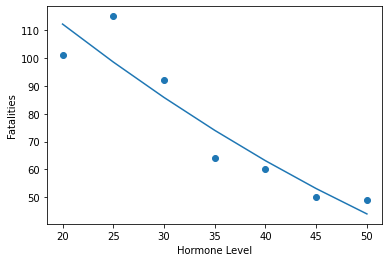

In [22]:
#Put your code for plotting
bestfit2 = A2*x
plt.scatter(H,f)
plt.plot(H, bestfit2)
plt.xlabel('Hormone Level')
plt.ylabel('Fatalities');

----
<a name="Assignment_wrap-up"></a>
# 4. Assignment wrap-up

Please fill out the [pre-class survey](https://docs.google.com/forms/d/e/1FAIpQLSfhEjAujkrA3E5h739qRzj9buceC2PhbCrSnc6ecHZoDydroQ/viewform) to receive credit for this assignment.

---------
### Congratulations, we're done!

To get credit for this assignment you must submit it before due date.